In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tavg = pd.read_csv('./data/NOAA_TAVG.csv')
tavg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
DATE    147 non-null int64
TAVG    147 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [3]:
tavg.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [4]:
tavg.set_index('DATE', inplace=True, drop=True)
tavg.index = pd.to_datetime(tavg.index, format='%Y')
tavg.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


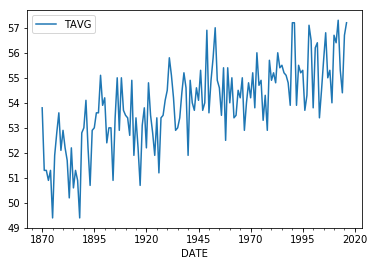

In [5]:
tavg.plot()

In [6]:
tavg['2000']

,TAVG
DATE,
2000-01-01,53.8


In [7]:
tavg = tavg.assign(percent_change=tavg['TAVG'].pct_change())
tavg = tavg.assign(difference=tavg['TAVG'].diff())
tavg.head()

,TAVG,percent_change,difference
DATE,,,
1870-01-01,53.8,NaN,NaN
1871-01-01,51.3,-0.046468,-2.5
1872-01-01,51.3,0.000000,0.0
1873-01-01,50.9,-0.007797,-0.4
1874-01-01,51.3,0.007859,0.4


In [8]:
tavg['TAVG'].autocorr()

0.57054784315964913

In [9]:
amzn = pd.read_csv('./data/AMZN.csv')
amzn.set_index('Date', inplace=True, drop=True)
amzn.index = pd.to_datetime(amzn.index)
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5088 entries, 1997-05-15 to 2017-08-02
Data columns (total 1 columns):
Adj Close    5088 non-null float64
dtypes: float64(1)
memory usage: 79.5 KB


In [10]:
amzn.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [11]:
msft = pd.read_csv('./data/MSFT.csv')
msft.set_index('Date', inplace=True, drop=True)
msft.index = pd.to_datetime(msft.index)
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [12]:
msft.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [13]:
df = pd.merge(amzn, msft, how='outer', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5090 entries, 1997-05-15 to 2017-08-04
Data columns (total 2 columns):
Adj Close_x    5088 non-null float64
Adj Close_y    1258 non-null float64
dtypes: float64(2)
memory usage: 119.3 KB


In [14]:
df.tail()

,Adj Close_x,Adj Close_y
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [15]:
df.columns = ["amzn", "msft"]
df.tail()

,amzn,msft
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [16]:
df['amzn_pc'] = df['amzn'].pct_change()
df['msft_pc'] = df['msft'].pct_change()
df.tail()

,amzn,msft,amzn_pc,msft_pc
Date,,,,
2017-07-31,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,996.190002,72.580002,0.008514,-0.001651
2017-08-02,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,NaN,72.150002,NaN,-0.001522
2017-08-04,NaN,72.680000,NaN,0.007346


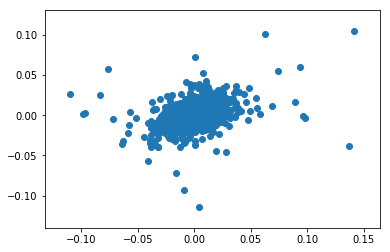

In [17]:
plt.scatter(df['amzn_pc'], df['msft_pc'])
plt.show()

In [18]:
df['amzn_pc'].corr(df['msft_pc'])

0.37790976628577627

## Regression

In [19]:
import statsmodels.api as sm

/home/shawn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
df = sm.add_constant(df)

In [21]:
df.tail()

,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2017-07-31,1.0,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,1.0,996.190002,72.580002,0.008514,-0.001651
2017-08-02,1.0,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,1.0,NaN,72.150002,NaN,-0.001522
2017-08-04,1.0,NaN,72.680000,NaN,0.007346


In [22]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2012-08-07 to 2017-08-02
Data columns (total 5 columns):
const      1255 non-null float64
amzn       1255 non-null float64
msft       1255 non-null float64
amzn_pc    1255 non-null float64
msft_pc    1255 non-null float64
dtypes: float64(5)
memory usage: 58.8 KB


In [23]:
df.head()

,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2012-08-07,1.0,236.559998,26.377876,0.010983,0.010350
2012-08-08,1.0,234.380005,26.438896,-0.009215,0.002313
2012-08-09,1.0,234.059998,26.587088,-0.001365,0.005605
2012-08-10,1.0,232.750000,26.517351,-0.005597,-0.002623
2012-08-13,1.0,232.440002,26.491201,-0.001332,-0.000986


In [24]:
results = sm.OLS(df['msft_pc'],df[['const','amzn_pc']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                msft_pc   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           6.99e-44
Time:                        10:59:33   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

## Autocorrelation function (ACF)

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

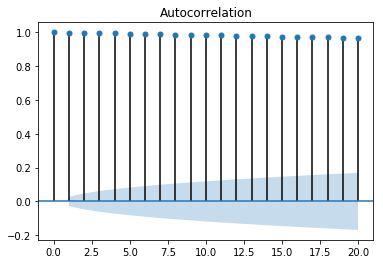

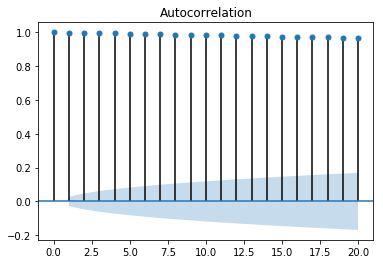

In [26]:
plot_acf(amzn, lags=20, alpha=0.05)

In [27]:
from statsmodels.tsa.stattools import acf

In [28]:
print(acf(amzn))

[ 1.          0.99832485  0.99664308  0.9949939   0.99325458  0.99143868
  0.98959781  0.98780755  0.98602265  0.98428051  0.98251203  0.98075127
  0.97898956  0.97729077  0.97561777  0.97395206  0.97227474  0.97062829
  0.9689624   0.96734192  0.96575617  0.96413962  0.96259378  0.96100578
  0.95936772  0.95766635  0.95599855  0.95428846  0.95254723  0.95081599
  0.94911487  0.94745289  0.94579533  0.94415015  0.9425648   0.94092076
  0.93924806  0.93762196  0.93596238  0.93420978  0.9324679 ]
